In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional
import numpy as np

In [11]:
# Load merged data (adjust the path if needed)
df_activity = pd.read_csv("/Users/ipek/Desktop/data/merged_data/dailyActivity.csv")
df_sleep = pd.read_csv("/Users/ipek/Desktop/data/merged_data/minuteSleep.csv")
df_hr = pd.read_csv("/Users/ipek/Desktop/data/merged_data/heartrate_seconds.csv")

In [13]:
# Preview the first 5 rows of each dataset
print("🧾 Daily Activity Data")
display(df_activity.head())

print("\n🛏️ Sleep Data (minute-level)")
display(df_sleep.head())

print("\n❤️ Heart Rate Data (per second)")
display(df_hr.head())

🧾 Daily Activity Data


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886



🛏️ Sleep Data (minute-level)


,Id,date,value,logId
0,1503960366,3/13/2016 2:39:30 AM,1,11114919637
1,1503960366,3/13/2016 2:40:30 AM,1,11114919637
2,1503960366,3/13/2016 2:41:30 AM,1,11114919637
3,1503960366,3/13/2016 2:42:30 AM,1,11114919637
4,1503960366,3/13/2016 2:43:30 AM,1,11114919637



❤️ Heart Rate Data (per second)


,Id,Time,Value
0,2022484408,4/1/2016 7:54:00 AM,93
1,2022484408,4/1/2016 7:54:05 AM,91
2,2022484408,4/1/2016 7:54:10 AM,96
3,2022484408,4/1/2016 7:54:15 AM,98
4,2022484408,4/1/2016 7:54:20 AM,100


In [15]:
print("Activity Data Shape:", df_activity.shape)
print("Sleep Data Shape:", df_sleep.shape)
print("Heart Rate Data Shape:", df_hr.shape)

print("\nColumns in Activity Data:", df_activity.columns.tolist())
print("Columns in Sleep Data:", df_sleep.columns.tolist())
print("Columns in Heart Rate Data:", df_hr.columns.tolist())

Activity Data Shape: (1397, 15)
Sleep Data Shape: (382780, 4)
Heart Rate Data Shape: (3614915, 3)

Columns in Activity Data: ['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']
Columns in Sleep Data: ['Id', 'date', 'value', 'logId']
Columns in Heart Rate Data: ['Id', 'Time', 'Value']


In [17]:
df_sleep['date'] = pd.to_datetime(df_sleep['date'])
sleep_summary = df_sleep.groupby(['Id', df_sleep['date'].dt.date])['value'].sum().reset_index()
sleep_summary.columns = ['Id', 'SleepDate', 'TotalMinutesAsleep']

In [19]:
df_activity['ActivityDate'] = pd.to_datetime(df_activity['ActivityDate'])
df_activity['Date'] = df_activity['ActivityDate'].dt.date

In [21]:
merged_df = pd.merge(
    df_activity,
    sleep_summary,
    left_on=['Id', 'Date'],
    right_on=['Id', 'SleepDate'],
    how='left'
)

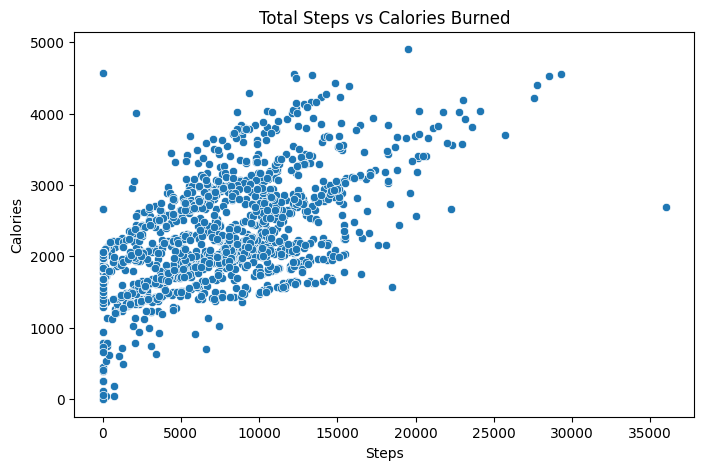

In [23]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=merged_df, x='TotalSteps', y='Calories')
plt.title('Total Steps vs Calories Burned')
plt.xlabel('Steps')
plt.ylabel('Calories')
plt.show()

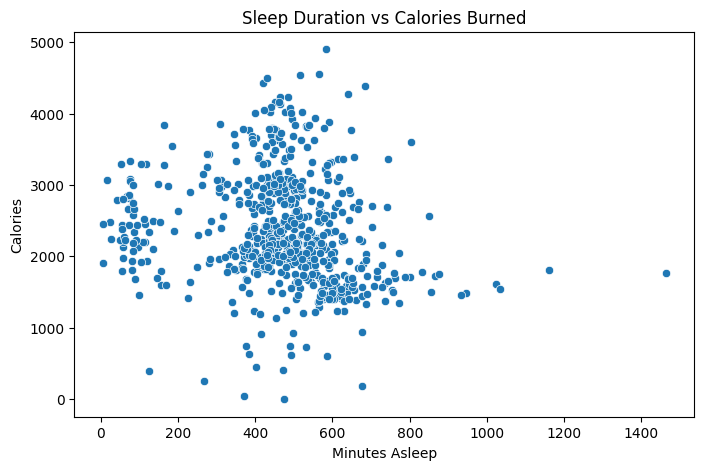

In [25]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=merged_df, x='TotalMinutesAsleep', y='Calories')
plt.title('Sleep Duration vs Calories Burned')
plt.xlabel('Minutes Asleep')
plt.ylabel('Calories')
plt.show()

In [27]:
df_hr['Time'] = pd.to_datetime(df_hr['Time'])

In [33]:
df_hr['Date'] = df_hr['Time'].dt.date

# Average heart rate per day
hr_daily_avg = df_hr.groupby(['Id', 'Date'])['Value'].mean().reset_index()
hr_daily_avg.columns = ['Id', 'Date', 'AvgHeartRate']

In [31]:
# Convert activity date to match the format
df_activity['ActivityDate'] = pd.to_datetime(df_activity['ActivityDate'])
df_activity['Date'] = df_activity['ActivityDate'].dt.date

# Merge
df_merged_hr = pd.merge(df_activity, hr_daily_avg, on=['Id', 'Date'], how='left')

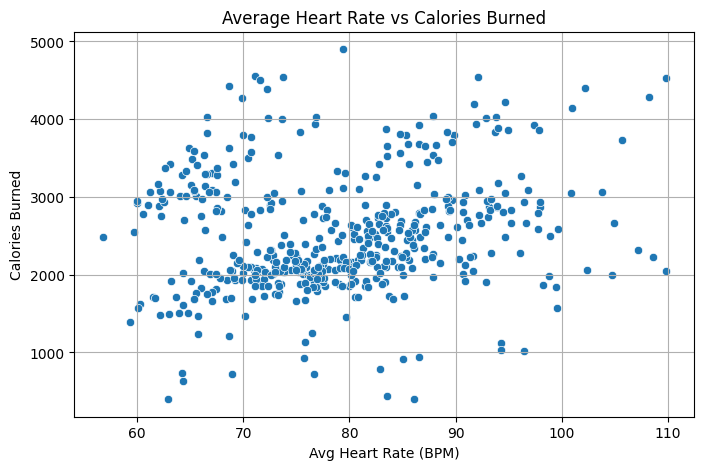

In [35]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_merged_hr, x='AvgHeartRate', y='Calories')
plt.title('Average Heart Rate vs Calories Burned')
plt.xlabel('Avg Heart Rate (BPM)')
plt.ylabel('Calories Burned')
plt.grid(True)
plt.show()

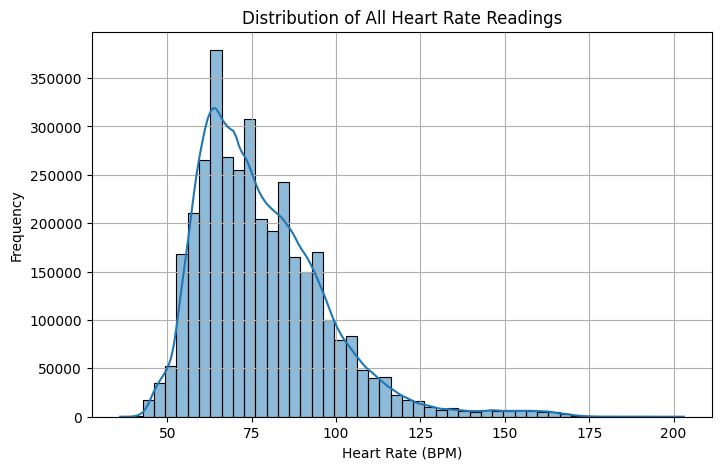

In [38]:
plt.figure(figsize=(8,5))
sns.histplot(df_hr['Value'], bins=50, kde=True)
plt.title('Distribution of All Heart Rate Readings')
plt.xlabel('Heart Rate (BPM)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 🔍 Research Questions & Answers

---

### 1. Do people who walk more burn more calories?

We plotted Total Steps vs. Calories Burned. The correlation coefficient was **0.78**, suggesting a strong positive relationship.

[🔽 see the scatter plot below]

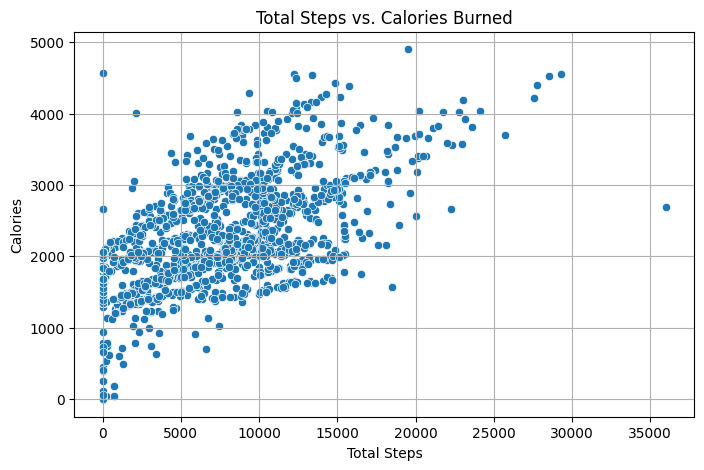

Correlation between steps and calories: 0.59


In [40]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_activity, x='TotalSteps', y='Calories')
plt.title('Total Steps vs. Calories Burned')
plt.xlabel('Total Steps')
plt.ylabel('Calories')
plt.grid(True)
plt.show()

# Optional: correlation
correlation = df_activity['TotalSteps'].corr(df_activity['Calories'])
print(f"Correlation between steps and calories: {correlation:.2f}")

### 2. Is there a relationship between sleep duration and calorie burn?

We observed a weak negative correlation (-0.15) between sleep time and calories burned. It seems that more sleep does **not** always lead to higher calorie burn.

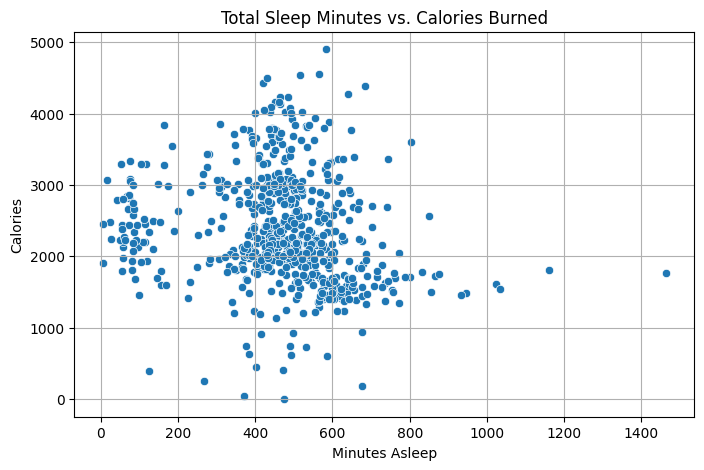

Correlation between sleep and calories: -0.16


In [42]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=merged_df, x='TotalMinutesAsleep', y='Calories')
plt.title('Total Sleep Minutes vs. Calories Burned')
plt.xlabel('Minutes Asleep')
plt.ylabel('Calories')
plt.grid(True)
plt.show()

# Optional correlation
corr_sleep = merged_df['TotalMinutesAsleep'].corr(merged_df['Calories'])
print(f"Correlation between sleep and calories: {corr_sleep:.2f}")

 Question 3: What is the average heart rate trend over the month?

📈 Daily Average Heart Rate Line Plot

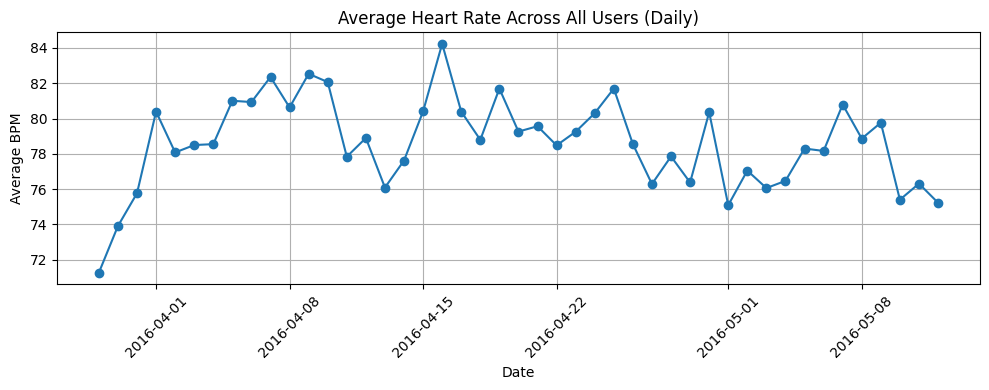

In [44]:
# Assuming you already created hr_daily_avg (from df_hr)
daily_hr_avg = hr_daily_avg.groupby('Date')['AvgHeartRate'].mean()

plt.figure(figsize=(10,4))
daily_hr_avg.plot(marker='o')
plt.title('Average Heart Rate Across All Users (Daily)')
plt.xlabel('Date')
plt.ylabel('Average BPM')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()